In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

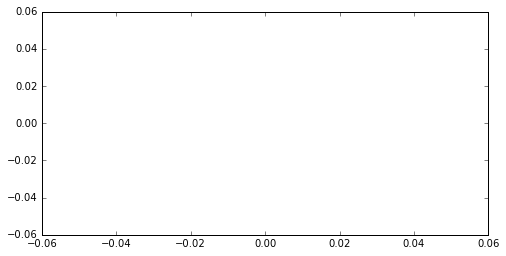

In [3]:
fig = plt.figure(figsize=plt.figaspect(0.50))
plt.plot()
plt.show()

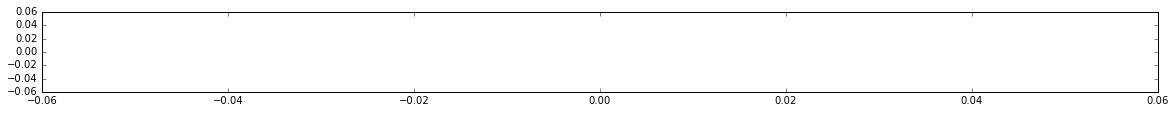

In [23]:
plt.figure(figsize=(20,10), dpi=100)
plt.subplot(611)
plt.plot()
plt.show()

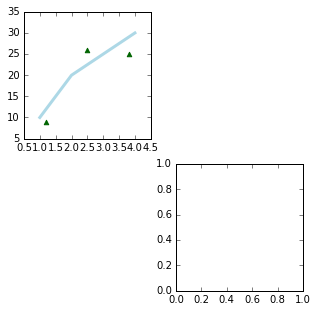

In [24]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax1 = fig.add_subplot(221)
ax1.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax1.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax1.set_xlim(0.5, 4.5)

ax4 = fig.add_subplot(224)

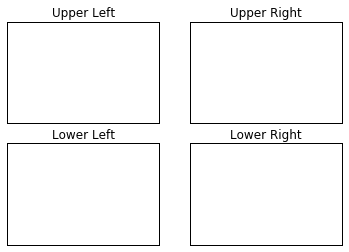

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

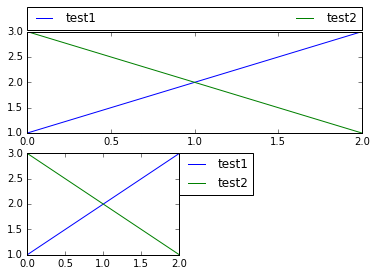

In [63]:
import matplotlib.pyplot as plt


plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()

In [73]:
import os
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def get_StateAvgRate():
    state_rate_dict = {}
    abs_path = os.path.abspath("../data/States/")
    listJsonFiles = os.listdir(abs_path)
    for file in listJsonFiles:
        state = file.split('.')[0]
        rating_list = []
        with open(abs_path + '/' + file) as jsonfile:
            jsonData = json.load(jsonfile)
        for business in jsonData["businesses"]:
            rating_list.append(business['rating'])
        rating_list = np.array(rating_list)
        avg_rate = [rating_list.mean()]
        state_rate_dict[state] = avg_rate
    df_avg_state = pd.DataFrame(state_rate_dict).T.reset_index()
    df_avg_state.columns = ['State', 'Avg_Rate'] 
    return df_avg_state

def get_StatePrice():
    concat_list = []
    abs_path = os.path.abspath("../data/States/")
    listJsonFiles = os.listdir(abs_path)
    for file in listJsonFiles:
        state = file.split('.')[0]
        price_list = []
        with open(abs_path + '/' + file) as jsonfile:
            jsonData = json.load(jsonfile)
        for business in jsonData["businesses"]:
            price_list.append(business.get('price'))
        price_list = np.array(price_list)
        price_list = price_list[price_list != np.array(None)] # remove None element
        s = pd.Series(price_list).value_counts().sort_index()
        d_dict = {'$':[s[0]],'$$':[s[1]],'$$$':[s[2]],'$$$$':[s.get("$$$$",0)]}
        concat_list.append(pd.DataFrame(d_dict,index=[state]))
    df_price_state = pd.concat(concat_list)
    return df_price_state

def price_avgRate():
    abs_path = os.path.abspath("../data/states_businesses.json")
    data = []
    with open(abs_path) as jsonfile:
        jsonData = json.load(jsonfile)
    for business in jsonData["businesses"]:
        data.append({'Price':business.get('price',''), 'Star':business.get('rating')})
    df = pd.DataFrame(data)
    df = df[df['Price'] != '']
    df_price_avgRate = df.groupby('Price').agg({'Star': [np.mean, np.size]})
    return df_price_avgRate

def plot_result(num):

    # 1 
    sns.set_style("darkgrid")
    X = np.array(df_price_state.index)
    x_axis = np.arange(len(X))
    Y1 = np.array(df_price_state['$'].values)
    Y2 = np.array(df_price_state['$$'].values)
    Y3 = np.array(df_price_state['$$$'].values)
    Y4 = np.array(df_price_state['$$$$'].values)

    ax1.plot(x_axis, Y1, color = 'r',linewidth=1.0, linestyle="-",label='$')
    ax1.plot(x_axis, Y2, color = 'g',linewidth=1.0, linestyle="-",label="$\$")
    ax1.plot(x_axis, Y3, color = 'k',linewidth=1.0, linestyle="-",label='$\$\$')
    ax1.plot(x_axis, Y4, color = 'y',linewidth=1.0, linestyle="-",label='$\$\$\$')

    ticks = ax1.set_xticks(np.arange(len(X)))
    labels = ax1.set_xticklabels(X, rotation=45, fontsize='large')
    ax1.set_title('Price of Each State')
    ax1.set_xlabel('State')
    ax1.set_ylabel('Number of Each Price Level')
    ax1.legend()
    sns.despine()

    #2
    sns.set_style("whitegrid")

    X = np.array(df_avg_state['State'])
    x_axis = np.arange(len(X))
    Y = df_avg_state['Avg_Rate'].values

    Y_max = Y.max()
    X_max_pos = df_avg_state[df_avg_state['Avg_Rate']==Y_max]['State'].index[0]
    Y_max_name = df_avg_state[df_avg_state['Avg_Rate']==Y_max]['State'].values[0]
    Y_min = Y.min()
    X_min_pos = df_avg_state[df_avg_state['Avg_Rate']==Y_min]['State'].index[0]
    Y_min_name = df_avg_state[df_avg_state['Avg_Rate']==Y_min]['State'].values[0]

    avg_rate_usa = df_avg_state['Avg_Rate'].mean()

    ticks = ax2.set_xticks(x_axis)
    labels = ax2.set_xticklabels(X, rotation=45, fontsize='large')

    ax2.plot([X_max_pos,X_min_pos] , [Y_max, Y_min], 'o')
    ax2.fill_between(x_axis, Y, Y_mean, color = 'lightblue',linewidth=3, label='_nolegend_')
    ax2.axhline(avg_rate_usa, color='r',alpha=0.3, linewidth=3, label='Avg Rate U.S.A ({})'.format(round(avg_rate_usa,4)))
    ax2.annotate('Hihgest Avg Rate: {} {}'.format(Y_max_name, np.round(Y_max, 4)), xy =(X_max_pos ,Y_max), 
                xytext=(22 , Y_max+0.02), arrowprops=dict(facecolor='red', shrink=0.05))
    ax2.annotate('Lowest Avg Rate: {} {}'.format(Y_min_name, np.round(Y_min, 4)), xy =(X_min_pos , Y_min), 
                xytext=(37 , Y_min), arrowprops=dict(facecolor='green', shrink=0.05))

    ax2.set_title('Average Rate of Each State',x =0.3, y = 0.05, fontsize=25)
    ax2.set_xlabel('State',fontsize=15)
    ax2.set_ylabel('Rate',fontsize=15)
    ax2.margins(x=0.02)
    sns.despine()
    ax2.legend(loc='best')

    # 3
    X = np.array(["$", "$\$", "$\$\$", "$\$\$\$"])
    x_axis = np.arange(len(X))
    Y = np.array(df_price_avgRate['Avg_Rate'].values)

    ax3.bar(x_axis, Y, color = 'r',linewidth=1.0, linestyle="-", align= 'center')
    for v, i in enumerate(Y):
        ax3.text(v-0.15, i+0.005, round(i,4), color='blue', fontweight='bold')

    ticks = ax3.set_xticks(np.arange(len(X)))
    labels = ax3.set_xticklabels(X, rotation=0, fontsize='large')
    ax3.set_title('Avg Star of Each Price Level', fontsize=20)
    ax3.set_xlabel('Price Level', fontsize=15)
    ax3.set_ylabel('Number of Each Price Level',fontsize=15)
    ax3.set_ylim([3.8,4.15])
    ax3.margins(y=0.5)

    # 4
    ax4 = fig.add_subplot(122)
    slices = df_price_avgRate['Count'].values
    prices = ['$','$\$','$\$\$','$\$\$\$']
    cols = ['c','m','r','b']

    ax4.pie(slices,labels=prices,colors=cols,startangle=90,shadow= True,
            explode=(0,0.05,0,0),labeldistance=1.1,autopct='%1.1f%%')
    ax4.set_title('Pie Chart of Each Price Level')

    plt.show()

In [74]:
# run
df_avg_state = get_StateAvgRate()
df_price_state = get_StatePrice()
df_price_avgRate = price_avgRate()

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((3,2), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,2), (2, 0))
ax4 = plt.subplot2grid((3,2), (2, 1))

plot_result()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wanlima/Documents/python/Python4DataAnalysis/data/States'